__If you are reading this on github, please follow [this link to the exact same notebook on Kaggle](https://www.kaggle.com/patrikdurdevic/digit-recognizer-mnist-tensorflow-deep-learning).__<br>
# Digit Recognizer
_MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike._

## Goal
The goal of this competition is to correctly identify digits from a dataset of tens of thousands of handwritten images.

## Solution
To solve the identification problem I will create a Convolutional Neural Network (CNN) using the TensorFlow library.

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data loading

In [0]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df.shape

(42000, 785)

Split the data and labels

In [0]:
train_labels = df["label"]
train_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [0]:
train_data = df.loc[:, df.columns != 'label']
train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Convert Pandas DataFrames to Numpy arrays

In [0]:
train_data = train_data.to_numpy()
train_labels = train_labels.to_numpy()

Normalize the data

In [0]:
train_data = train_data / 255

Reshape the data

In [0]:
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
train_data.shape

(42000, 28, 28, 1)

### CNN Model

__Create the model and compile it__
* SparseCategoricalCrossentropy loss function
* Adam optimizer

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=2, padding='same', activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2, padding='same', activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(4,4), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Training

In [0]:
history = model.fit(train_data, train_labels, epochs=20, batch_size=32)

Train on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 13s 298us/sample - loss: 1.5354 - accuracy: 0.9352
Epoch 2/20
42000/42000 [==============================] - 8s 184us/sample - loss: 1.4887 - accuracy: 0.9748
Epoch 3/20
42000/42000 [==============================] - 8s 185us/sample - loss: 1.4830 - accuracy: 0.9800
Epoch 4/20
42000/42000 [==============================] - 8s 182us/sample - loss: 1.4807 - accuracy: 0.9816
Epoch 5/20
42000/42000 [==============================] - 8s 188us/sample - loss: 1.4783 - accuracy: 0.9837
Epoch 6/20
42000/42000 [==============================] - 8s 202us/sample - loss: 1.4767 - accuracy: 0.9850
Epoch 7/20
42000/42000 [==============================] - 8s 195us/sample - loss: 1.4762 - accuracy: 0.9858
Epoch 8/20
42000/42000 [==============================] - 8s 185us/sample - loss: 1.4748 - accuracy: 0.9866
Epoch 9/20
42000/42000 [==============================] - 8s 184us/sample - loss: 1.4739 - accuracy: 0.9877
Epoc

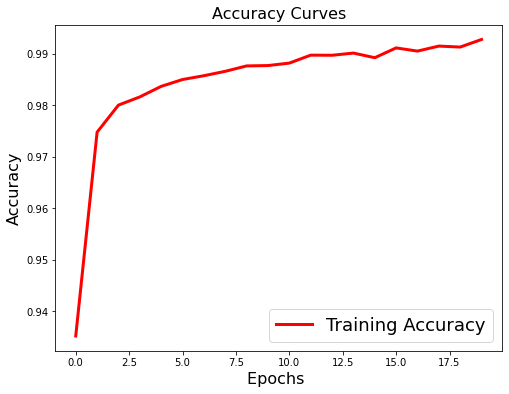

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

## Inference

Load the test data

In [0]:
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
df_test.shape

(28000, 784)

Preprocessing

In [0]:
test_data = df_test.to_numpy()
test_data = test_data / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))
test_data.shape

(28000, 28, 28, 1)

__Predicting__

In [0]:
predictions = model.predict(test_data)
predictions = np.asarray([np.argmax(prediction) for prediction in predictions])
predictions.shape

(28000,)

Processing data for saving

In [0]:
df_predictions = pd.DataFrame(predictions).rename(columns={0: "Label"})
df_predictions.index.names = ['ImageId']
df_predictions.index += 1
df_predictions.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


Save as CSV

In [0]:
df_predictions.shape
df_predictions.to_csv("predictions.csv")